In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,'..')
from food.psql import *
from food.paths import *
from mytools.tools import *

import pandas as pd
from PIL import Image

from food.search import *
from mytools.psql import *
from mytools.visual import visualize_array

dev
Since no pretrained weights have been provided, we load the reference pretrained DINO weights.


/home/dima/anaconda3/envs/f4/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (UnsupervisedMetrics). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)


/home/dima/FoodSeg103-Benchmark-v1/checkpoints/SETR_Naive_ReLeM


/home/dima/FoodSeg103-Benchmark-v1/mmseg/models/builder.py:59: UserWarning: train_cfg and test_cfg is deprecated, please specify them in model
  warnings.warn(


load pre-trained weight from imagenet21k


/home/dima/mytools/mytools/visual.py:24: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  series2tensor = lambda series:torch.tensor([np.array(c) for c in series.values])


In [3]:
df = pd.read_sql('select * from food.dishes',engine)

In [4]:
photo_ids = df[df['user_id']==78882798]['photo_id'].drop_duplicates().tolist()

In [176]:
photo_id = photo_ids[-14]

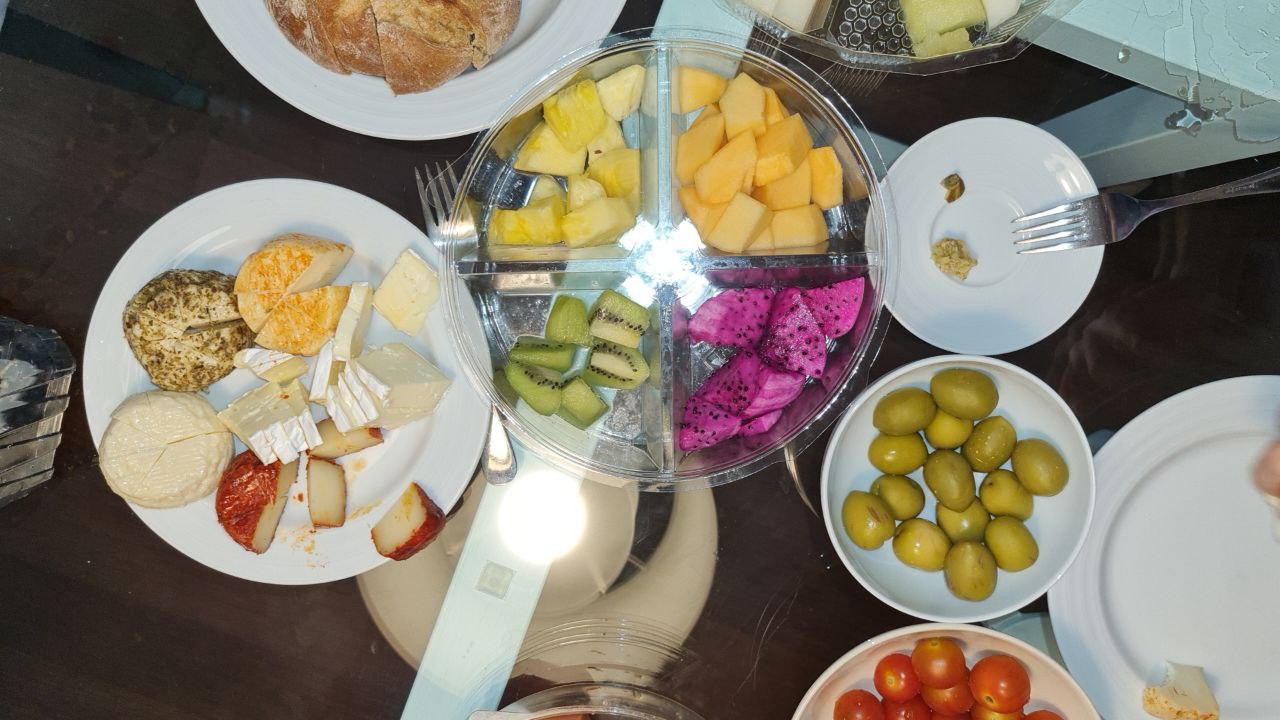

In [177]:
Image.open(reference_images_path/photo_id)

In [178]:
q = f"""select f.*, d.area,d.score
   from food.foods f 
   join food.dishes d on (d.food_id = f.id)
   where d.photo_id = '{photo_id}' 
   order by d.area desc"""

df = pd.read_sql(q,engine);df

,id,description,category,energy,protein,carb,fat,clip,area,score
0,1102732,"Fruit salad, including citrus fruits, with mar...",Other fruits and fruit salads,235.0,1.96,16.98,18.76,"[0.018805793, 0.037304252, -0.005537693, 0.041...",99709,0.255654
1,1103679,"Olives, green","Olives, pickles, pickled vegetables",145.0,1.03,3.84,15.32,"[0.0804495, 0.044471845, 0.020338928, -0.02529...",28982,0.262377
2,1100875,"Muffin, plain","Biscuits, muffins, quick breads",370.0,5.78,51.69,15.95,"[0.00041801963, 0.0005331412, 0.026908036, -0....",27019,0.258759
3,1102667,"Kiwi fruit, raw",Other fruits and fruit salads,58.0,1.06,14.00,0.44,"[0.024145706, 0.023971848, 0.011329614, -0.010...",10373,0.273957
4,1103281,"Tomatoes, canned, reduced sodium, cooked",Tomatoes,38.0,0.78,3.37,2.79,"[0.041481014, -0.0037259196, 0.009854932, -0.0...",9246,0.282552
5,1102690,"Pineapple, canned, in syrup",Pineapple,60.0,0.40,15.60,0.11,"[0.013356249, -0.004244596, 0.00556979, 0.0279...",3380,0.264596
6,1098005,"Cheese, Camembert",Cheese,300.0,19.80,0.46,24.26,"[0.027888216, 0.030513706, 0.029767856, 0.0062...",3102,0.255606
7,1098042,Queso Fresco,Cheese,299.0,18.09,2.98,23.82,"[0.0151637215, -0.01325532, 0.020275801, -0.00...",2871,0.261979
8,1103020,"Potato, baked, peel not eaten, with cheese","White potatoes, baked or boiled",152.0,3.61,17.67,7.73,"[0.03511487, -0.015324752, 0.021008767, 0.0330...",2570,0.280067
9,1103020,"Potato, baked, peel not eaten, with cheese","White potatoes, baked or boiled",152.0,3.61,17.67,7.73,"[0.03511487, -0.015324752, 0.021008767, 0.0330...",1484,0.277566


In [179]:
output = '; '.join(df['description'].tolist())

In [180]:
img,clip_df,masks,urls,stats = search(f'https://dima.grankin.eu/reference_images/{photo_id}')

/home/dima/anaconda3/envs/f4/lib/python3.9/site-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/dima/anaconda3/envs/f4/lib/python3.9/site-packages/torch/nn/functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/home/dima/anaconda3/envs/f4/lib/python3.9/site-packages/torchvision/transforms/transforms.py:287: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/home/dima/anaconda3/envs/f

In [181]:
clip_df

,id,description,category,energy,protein,carb,fat,text,clip,score,classes,area
1,1098036,"Cheese, Swiss, nonfat or fat free",Cheese,127.0,28.40,3.40,0.00,the food is cheese . it has a little bit of ...,"[0.018031025, -0.005304293, -0.004824876, 0.00...",0.248742,10,99709
4,1102887,"Potato, boiled, from fresh, peel not eaten, ma...","White potatoes, baked or boiled",130.0,1.86,20.45,4.84,"the food is white potatoes, baked or boiled . ...","[0.023196455, 0.01686805, 0.007660139, 0.06520...",0.260736,36,28982
8,1100872,"Muffin, bran with fruit, lowfat","Biscuits, muffins, quick breads",177.0,5.34,40.21,1.49,"the food is biscuits, muffins, quick breads . ...","[-0.0015836738, -0.009518478, 0.004086065, -0....",0.267366,59,27019
6,1102667,"Kiwi fruit, raw",Other fruits and fruit salads,58.0,1.06,14.00,0.44,the food is other fruits and fruit salads . it...,"[0.036289953, 0.014387542, -0.014378575, 0.008...",0.294054,43,10373
10,1103281,"Tomatoes, canned, reduced sodium, cooked",Tomatoes,38.0,0.78,3.37,2.79,the food is tomatoes . it has a little bit of ...,"[0.049460392, -0.012618358, -0.016774036, 0.00...",0.263165,74,9246
5,1103580,"Summer squash, yellow or green, NS as to form,...",Other vegetables and combinations,47.0,1.27,3.99,3.32,the food is other vegetables and combinations ...,"[0.032619063, 0.021243708, 0.019713128, 0.0229...",0.280166,41,3380
2,1102099,"Quiche with meat, poultry or fish",Turnovers and other grain-based items,386.0,15.80,11.76,30.70,the food is turnovers and other grain-based it...,"[0.049003422, 0.02346417, -0.0021760017, 0.019...",0.286206,25,3102
7,1098375,"Veal cutlet or steak, NS as to cooking method,...","Beef, excludes ground",209.0,33.67,0.00,7.28,"the food is beef, excludes ground . it has a l...","[0.0030769857, 0.013291825, 0.02476155, 0.0216...",0.252337,50,2871
9,1102884,"Potato, boiled, from fresh, peel not eaten, NS...","White potatoes, baked or boiled",125.0,1.87,20.45,4.24,"the food is white potatoes, baked or boiled . ...","[0.013056363, 0.01658716, 0.0035505963, 0.0510...",0.269049,71,2570
3,1102906,"Potato, roasted, from fresh, peel not eaten, N...","White potatoes, baked or boiled",125.0,1.87,20.45,4.24,"the food is white potatoes, baked or boiled . ...","[0.013742536, 0.010857155, -1.5531163e-05, 0.0...",0.270874,26,1484


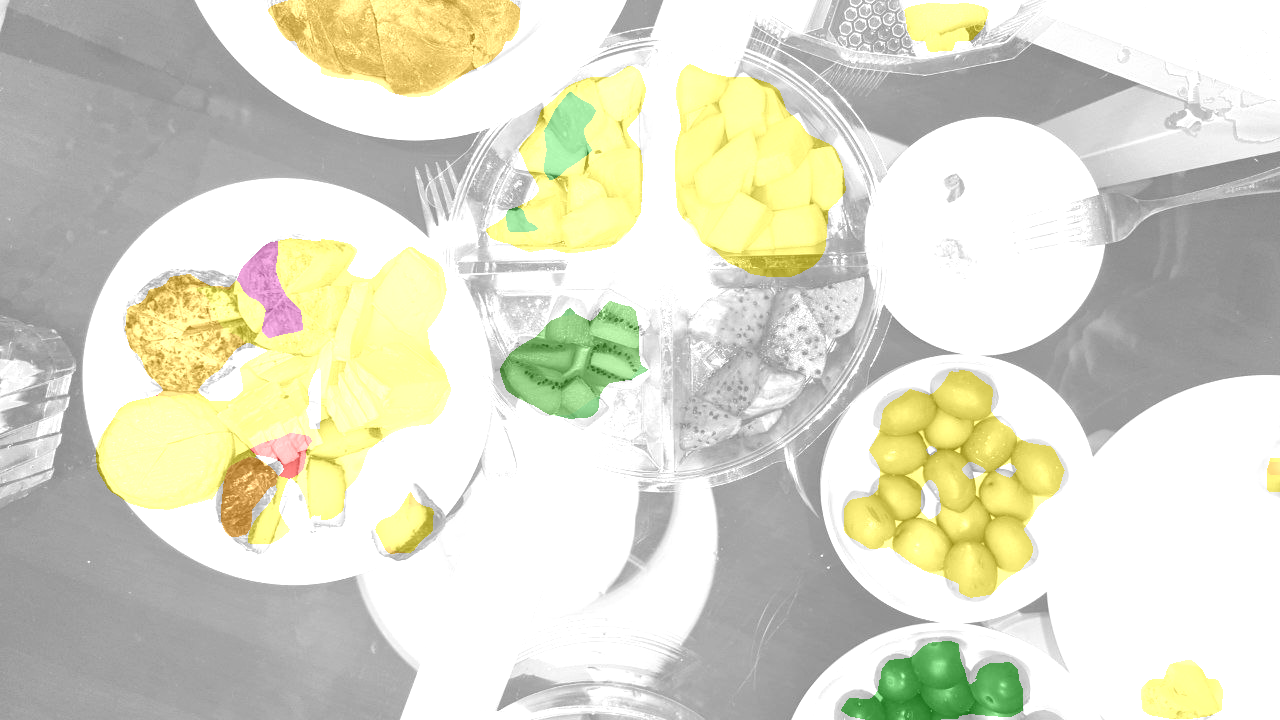

In [182]:
img

In [51]:
get_heatmap??

Signature:
get_heatmap(
    arr,
    colors=['white', 'lime', 'green', 'yellow', 'orange', 'red', 'purple'],
    values=[0, 1, 50, 100, 200, 300, 400],
)
Docstring: <no docstring>
Source:   
def get_heatmap(arr,
                colors = ["white","lime","green","yellow","orange", "red","purple"],
                values = [0,1,50,100,200,300,400]):

    l = list(zip([v/max(values) for v in values],colors))
    cmap=LinearSegmentedColormap.from_list('hmap',l)
    return apply_custom_colormap((np.array(arr)/max(values)*255).astype(np.uint8),cmap)
File:      ~/food/food/search.py
Type:      function


In [108]:
colors = ["white","lime","green","yellow","orange", "red","purple"],
values = [0,           1,     50,     100,     200,   300,     900]

In [109]:
import numpy as np

In [116]:
m = np.copy(masks[0])

In [130]:
m[m!=0] = 500

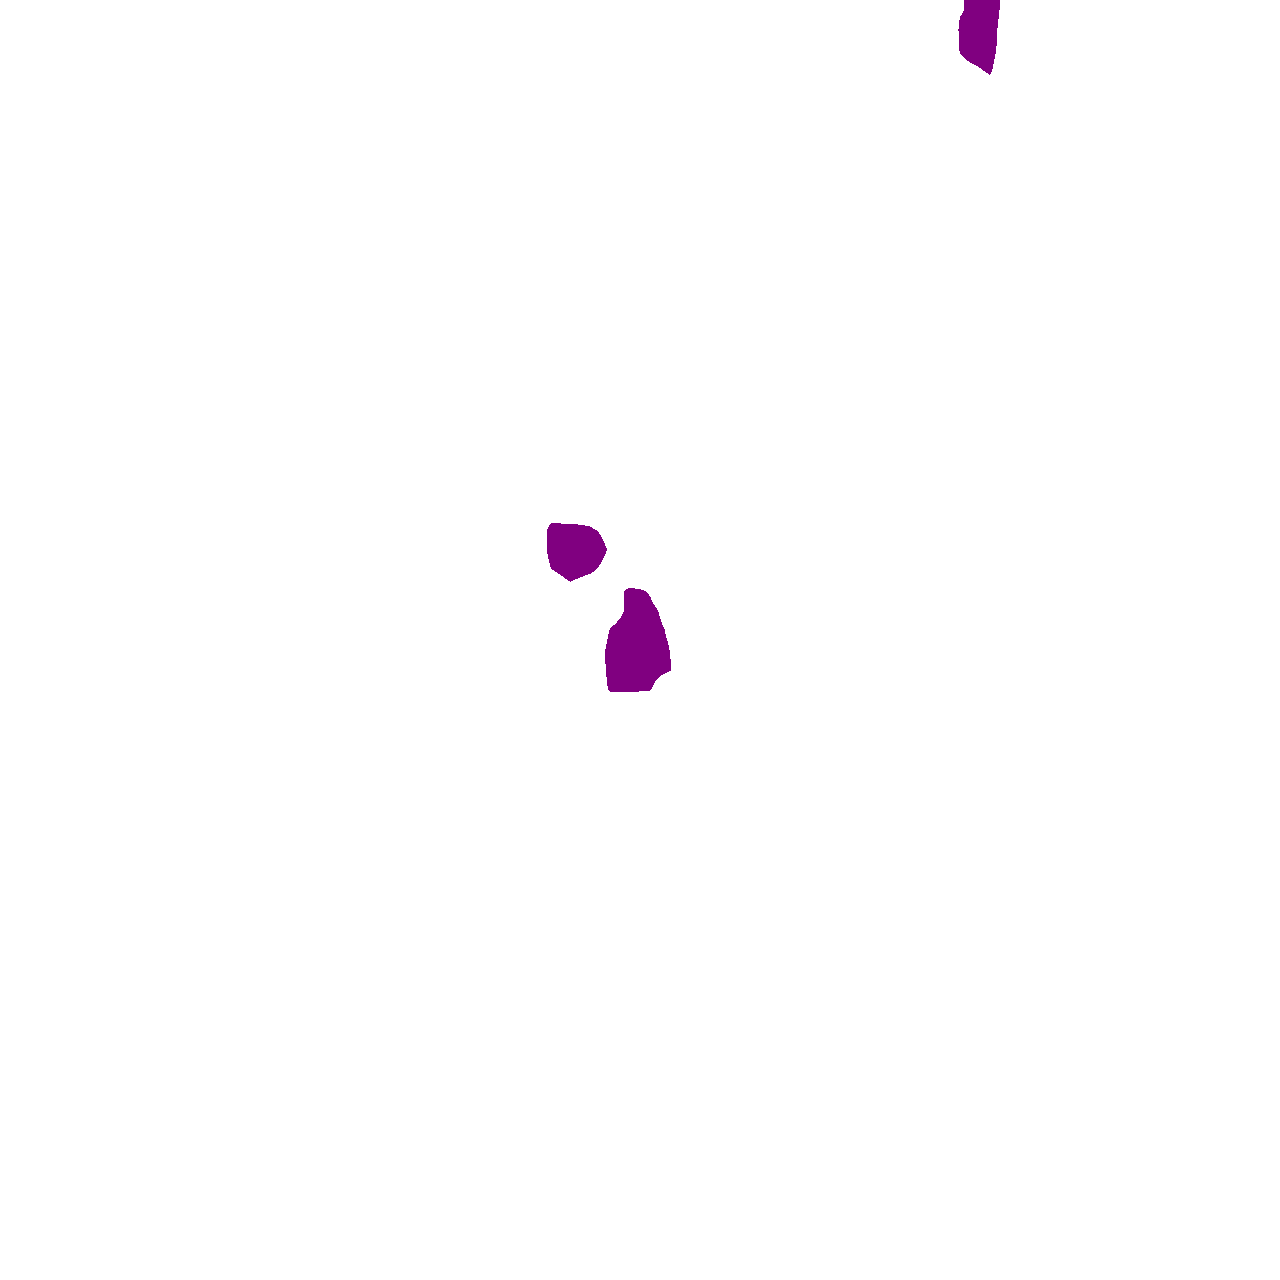

In [131]:
Image.fromarray(get_heatmap(m))